In [158]:
import os
import pandas as pd
import seaborn as sns
DATA_PATH = os.path.join("../datasets", "red_wine")

def load_data(fileName, data_path=DATA_PATH):
    csv_path = os.path.join(data_path, fileName)
    return pd.read_csv(csv_path)

In [159]:
data = load_data('winequality-red.csv')
data_copy = data
data_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [160]:
data_copy.info() #No data cleaning required since there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [161]:
data_copy['citric acid to volatile acidity'] = data_copy['citric acid'] / data_copy['volatile acidity']
data_copy['citric acid to fixed acidity'] = data_copy['citric acid'] / data_copy['fixed acidity']
data_copy['free to total sulfur dioxide'] = data_copy['free sulfur dioxide'] / data_copy['total sulfur dioxide']

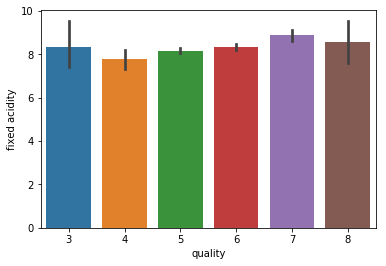

In [162]:
sns.barplot(x='quality', y='fixed acidity', data=data_copy)

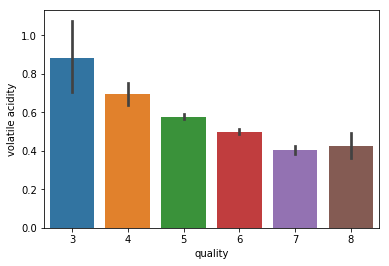

In [163]:
sns.barplot(x='quality', y='volatile acidity', data=data_copy)

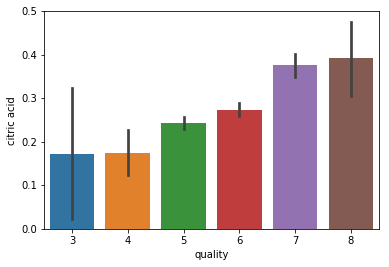

In [164]:
sns.barplot(x='quality', y='citric acid', data=data_copy)

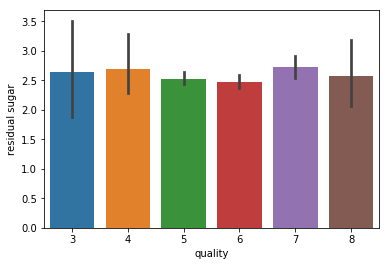

In [165]:
sns.barplot(x='quality', y='residual sugar', data=data_copy)

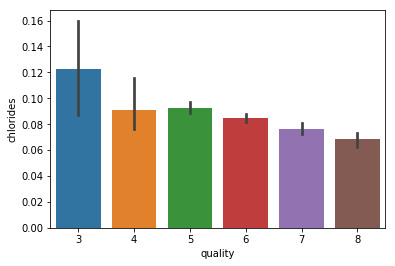

In [166]:
sns.barplot(x='quality', y='chlorides', data=data_copy)

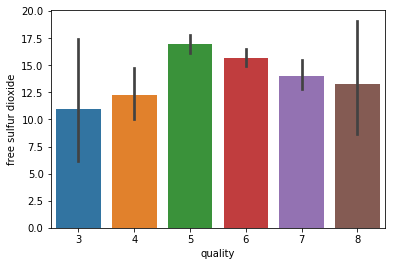

In [167]:
sns.barplot(x='quality', y='free sulfur dioxide', data=data_copy)

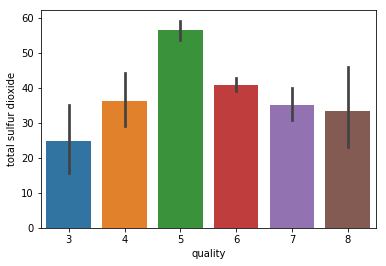

In [168]:
sns.barplot(x='quality', y='total sulfur dioxide', data=data_copy)

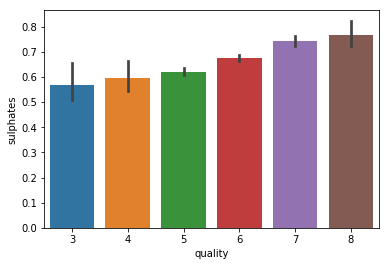

In [169]:
sns.barplot(x='quality', y='sulphates', data=data_copy)

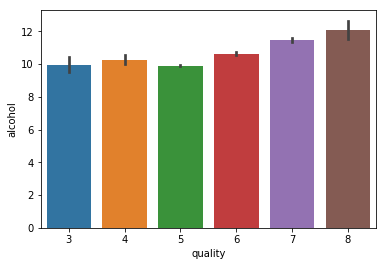

In [170]:
sns.barplot(x='quality', y='alcohol', data=data_copy)

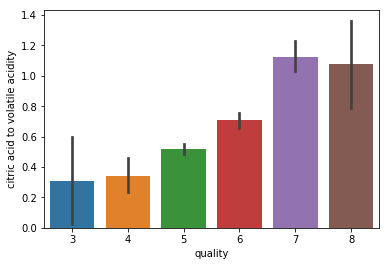

In [171]:
sns.barplot(x='quality', y='citric acid to volatile acidity', data=data_copy)

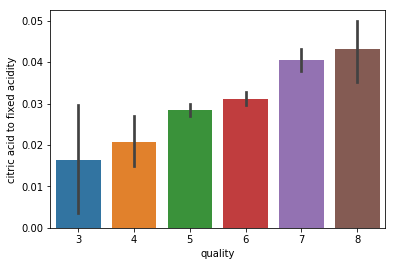

In [172]:
sns.barplot(x='quality', y='citric acid to fixed acidity', data=data_copy)

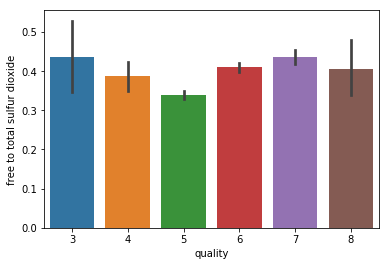

In [173]:
sns.barplot(x='quality', y='free to total sulfur dioxide', data=data_copy)

In [174]:
corr_matrix = data_copy.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                            1.000000
alcohol                            0.476166
citric acid to volatile acidity    0.318031
sulphates                          0.251397
citric acid                        0.226373
citric acid to fixed acidity       0.209167
free to total sulfur dioxide       0.194113
fixed acidity                      0.124052
residual sugar                     0.013732
free sulfur dioxide               -0.050656
pH                                -0.057731
chlorides                         -0.128907
density                           -0.174919
total sulfur dioxide              -0.185100
volatile acidity                  -0.390558
Name: quality, dtype: float64

In [175]:
data_copy['quality'] = [1 if quality >= 6.5 else 0 for quality in data_copy['quality']]

In [176]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_copy, test_size=0.2, random_state=42)
train_set_labels = train_set['quality']
test_set_labels = test_set['quality']

In [177]:
train_set.drop('quality', axis=1, inplace=True)
test_set.drop('quality', axis=1, inplace=True)

/home/felix/Documents/Software_Projects/Python/Machine_Learning/env/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [271]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [272]:
prepared_train_data = pipeline.fit_transform(train_set)
prepared_test_data = pipeline.fit_transform(test_set)

In [282]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV

models = [
    {'model': BernoulliNB(), 'model_name': 'BernoulliNB', 'params': {'binarize': [binarize for binarize in np.arange(0, 1, 0.01)],
                                        'fit_prior': [True, False]}},
    {'model': DecisionTreeClassifier(), 'model_name': 'DecisionTreeClassifier', 'params': {'splitter': ['best', 'random'],
                                                   'max_depth': [depth for depth in range(1, 100)],
                                                   'min_samples_split': [min_samples for min_samples in np.arange(0.1, 1, 0.01)],
                                                   'min_samples_leaf': [min_leaf for min_leaf in range(1, 10)]}},
    {'model': RandomForestClassifier(), 'model_name': 'RandomForestClassifier', 'params': {'n_estimators': [n for n in range(1, 100)],
                                                   'max_depth': [depth for depth in range(1, 100)],
                                                   'min_samples_split': [min_samples for min_samples in np.arange(0.1, 1, 0.01)],
                                                   'min_samples_leaf': [min_leaf for min_leaf in range(1, 10)]}},
    {'model': KNeighborsClassifier(), 'model_name': 'KNeighborsClassifier', 'params': {'n_neighbors': [n for n in range(1, 500)],
                                                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                                                 'leaf_size': [size for size in range(1, 5000)]}},
    {'model': SVC(), 'model_name': 'SVC', 'params': {'C': [c for c in np.arange(0.01, 3, 0.01)],
                                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                'degree': [degree for degree in range(1, 5)]}}
]

In [314]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

def model_selection(X, y, model_info):
    """
    Test various estimators.
    """    
    model = Pipeline([
        ('estimator', model_info['model'])
    ])
    
    model.fit(X, y)  

    expected  = y
    predicted = model.predict(X)

    print('Model:', model_info['model_name'], ',', 'Precision:', (f1_score(expected, predicted)) * 100, '%')
    print(cross_validate(model_info['model'], model_info['model_name'], X, y))

def cross_validate(estimator, estimator_name, X, y):
    scores = cross_val_score(estimator, X, y, scoring='neg_mean_squared_error', cv=10)
    plot_scores(scores, estimator_name)
    
def plot_scores(scores, estimator_name):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [315]:
for model in models:
    model_selection(prepared_test_data, test_set_labels, model)

Model: BernoulliNB , Precision: 55.11811023622046 %
Scores: [-0.03030303 -0.12121212 -0.36363636 -0.15625    -0.15625    -0.1875
 -0.21875    -0.12903226 -0.29032258 -0.19354839]
Mean: -0.18468047409579666
Standard Deviation: 0.08775347395513215
None
Model: DecisionTreeClassifier , Precision: 100.0 %
Scores: [-0.09090909 -0.24242424 -0.27272727 -0.1875     -0.09375    -0.125
 -0.15625    -0.06451613 -0.25806452 -0.22580645]
Mean: -0.17169477028347996
Standard Deviation: 0.07235727604560635
None
Model: RandomForestClassifier , Precision: 90.69767441860465 %
Scores: [-0.12121212 -0.12121212 -0.27272727 -0.125      -0.15625    -0.15625
 -0.09375    -0.06451613 -0.16129032 -0.16129032]
Mean: -0.14334982893450637
Standard Deviation: 0.05263728917113979
None
Model: KNeighborsClassifier , Precision: 60.97560975609756 %
Scores: [-0.15151515 -0.09090909 -0.21212121 -0.09375    -0.15625    -0.09375
 -0.25       -0.06451613 -0.19354839 -0.25806452]
Mean: -0.1564424486803519
Standard Deviation: 0.

In [ ]:
random_grid = {
    'n_estimators': [n for n in range(1, 100)],
    'max_depth': [depth for depth in range(1, 100)],
    'min_samples_split': [min_samples for min_samples in np.arange(0.1, 1, 0.01)],
    'min_samples_leaf': [min_leaf for min_leaf in range(1, 10)]
}

In [324]:
final_model = RandomForestClassifier()
final_model.fit(train_set, train_set_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [325]:
predictions = final_model.predict(prepared_test_data)

In [326]:
print(classification_report(test_set_labels, predictions))

             precision    recall  f1-score   support

          0       0.87      0.91      0.89       273
          1       0.27      0.19      0.22        47

avg / total       0.78      0.81      0.79       320

